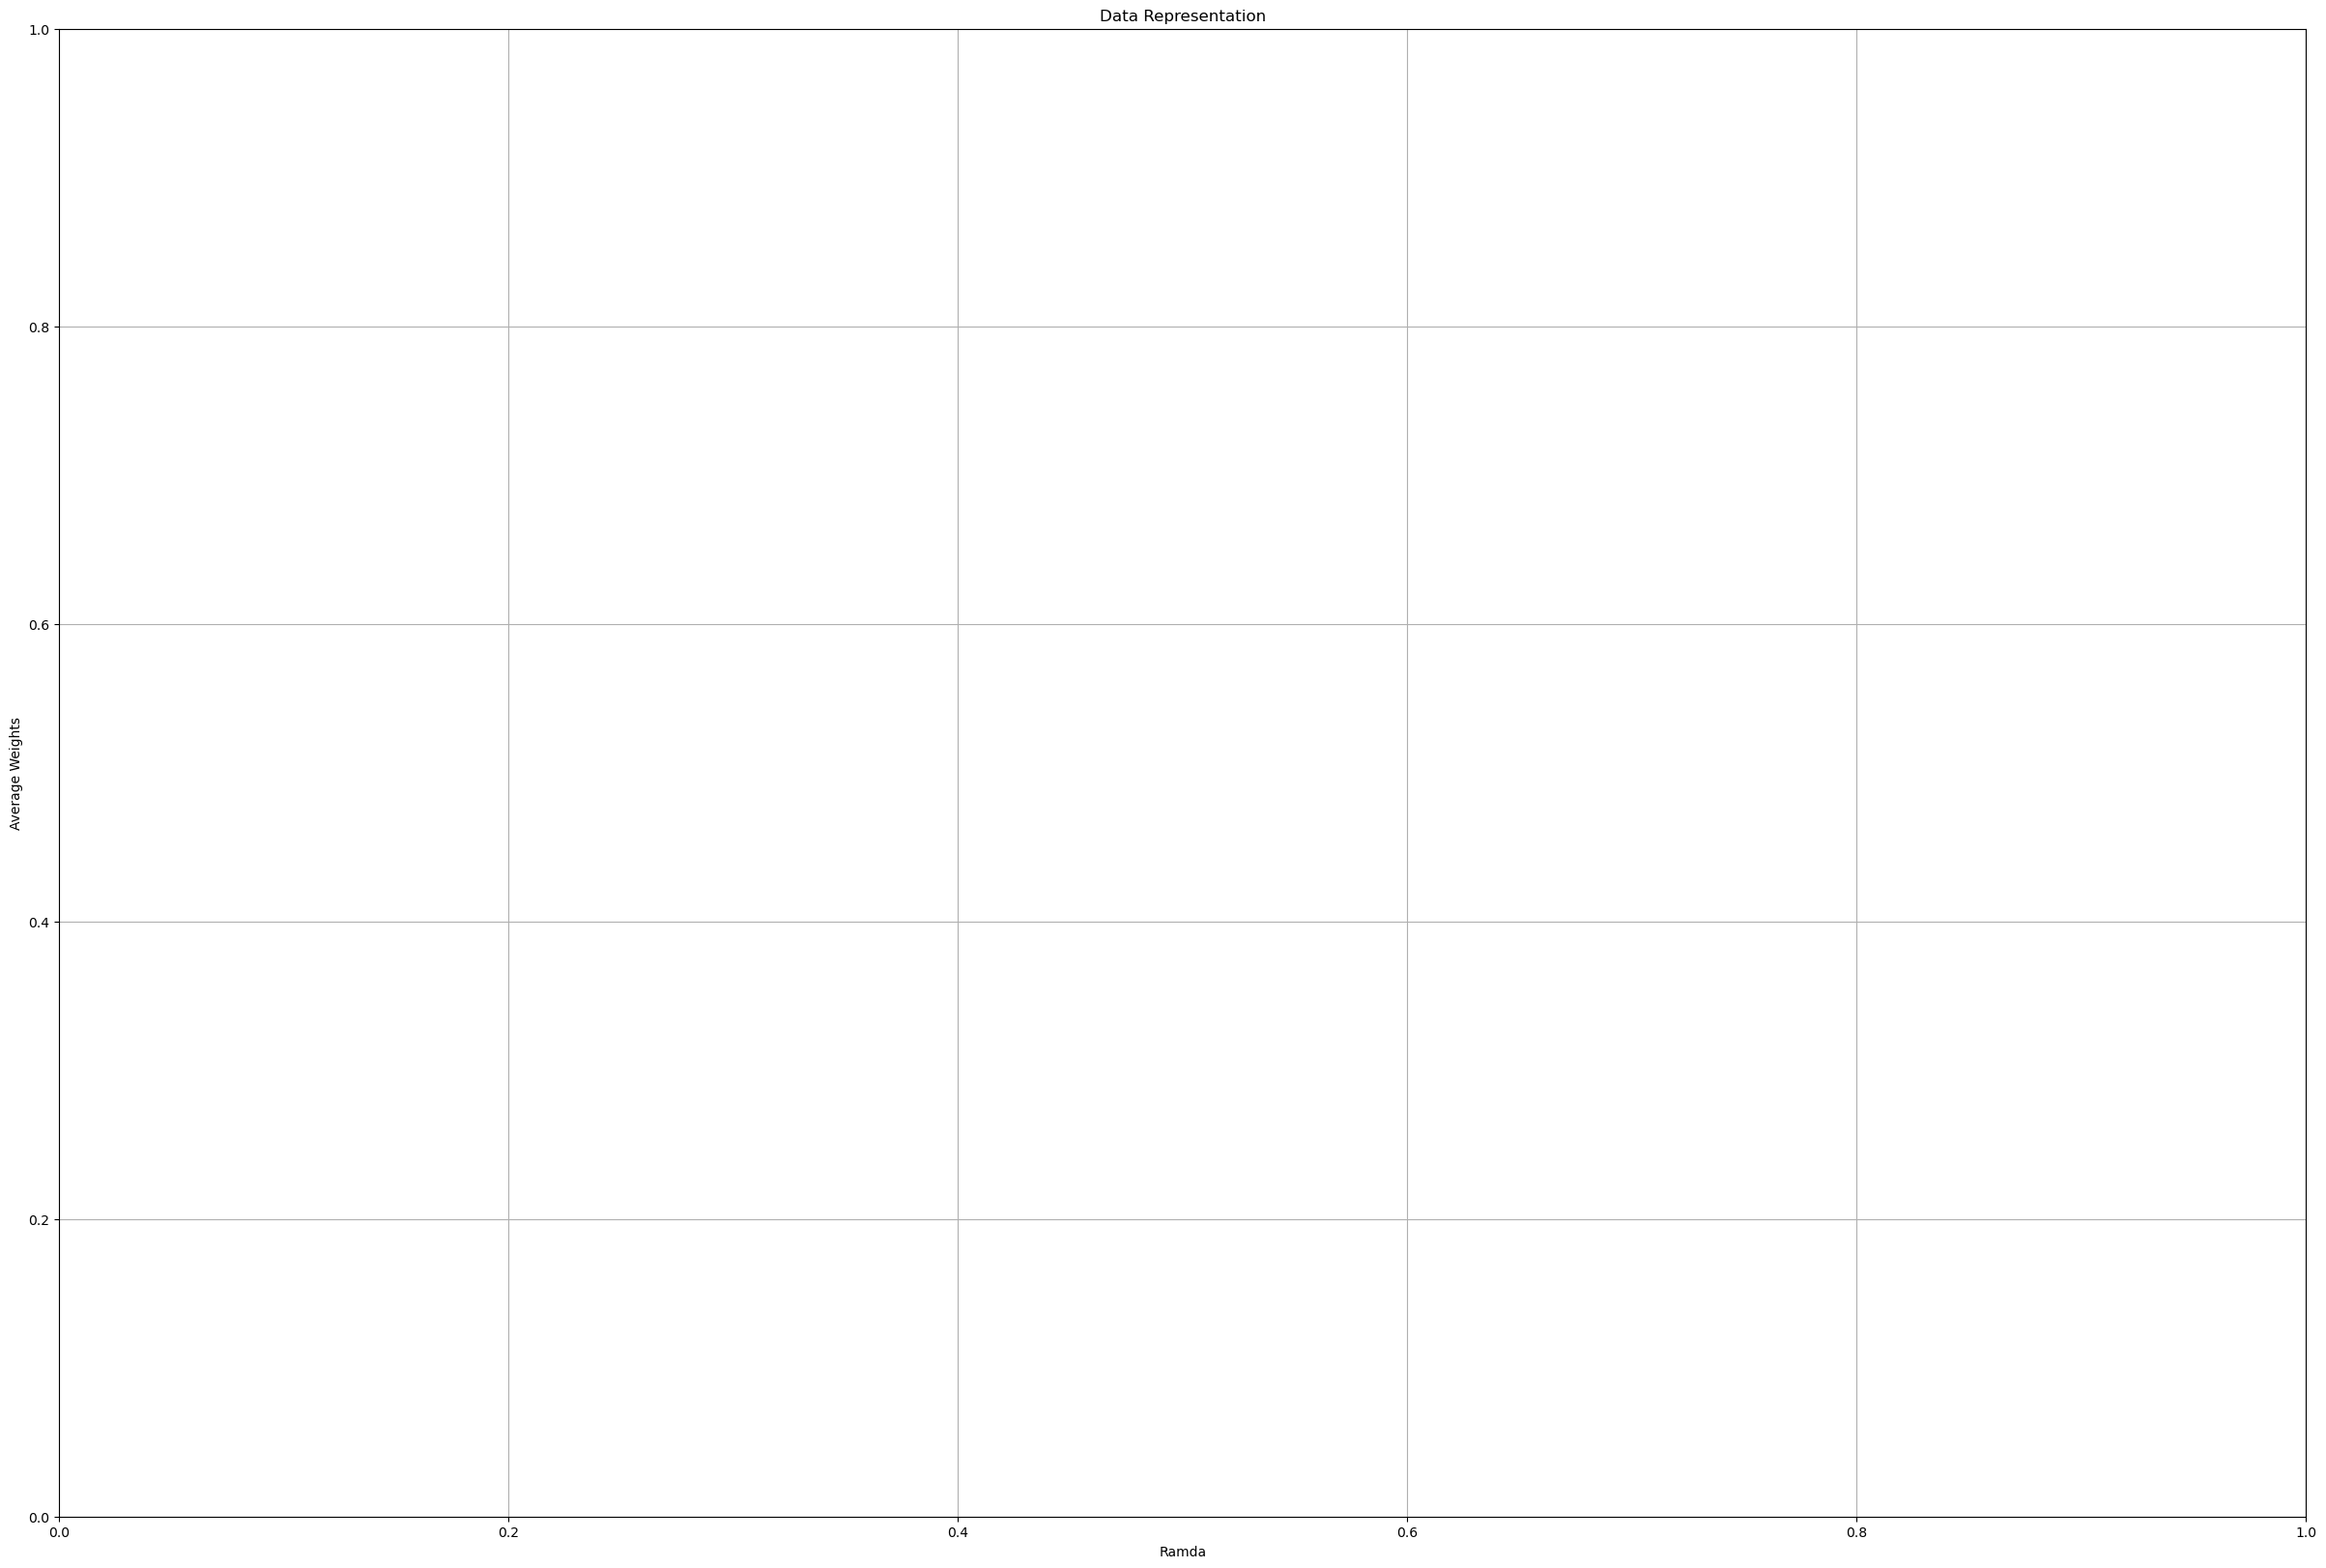

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def parse_data(line):
    if not line.startswith("ClassID"):
        return None

    try:
        split_data = line.split(" : ")
        class_id = int(split_data[1])
        ramda = float(split_data[3])
        outlayer = int(split_data[5])
        weights = [float(weight) for weight in split_data[7].split(", ")]

        return {'class_id': class_id, 'ramda': ramda, 'outlayer': outlayer, 'weights': weights}
    except:
        return None

# Read the data from a file
with open(r'C:\\BEnvironment\\TempFiles\\_rce_Step2_MusicSymbol.dat', 'r') as f:
    lines = f.readlines()

# Parse each line, skipping lines that don't fit the format
data = [parse_data(line) for line in lines]
data = [d for d in data if d is not None]  # Remove None values from the list

plt.figure(figsize=(30, 20))
colors = ['green','red', 'blue', 'black', 'purple', 'pink']
for item in data:
    x = item['ramda']
    y = np.mean(item['weights'])
    color =  colors[item['class_id']]
    plt.scatter(x, y, color=color)

plt.xlabel('Ramda')
plt.ylabel('Average Weights')
plt.title('Data Representation')
plt.grid(True)

# Save the figure
plt.savefig("scatter_plot.png")

plt.show()


Skipping line due to error: list index out of range
Skipping line due to error: list index out of range
Skipping line due to error: list index out of range
Skipping line due to error: list index out of range
Skipping line due to error: list index out of range


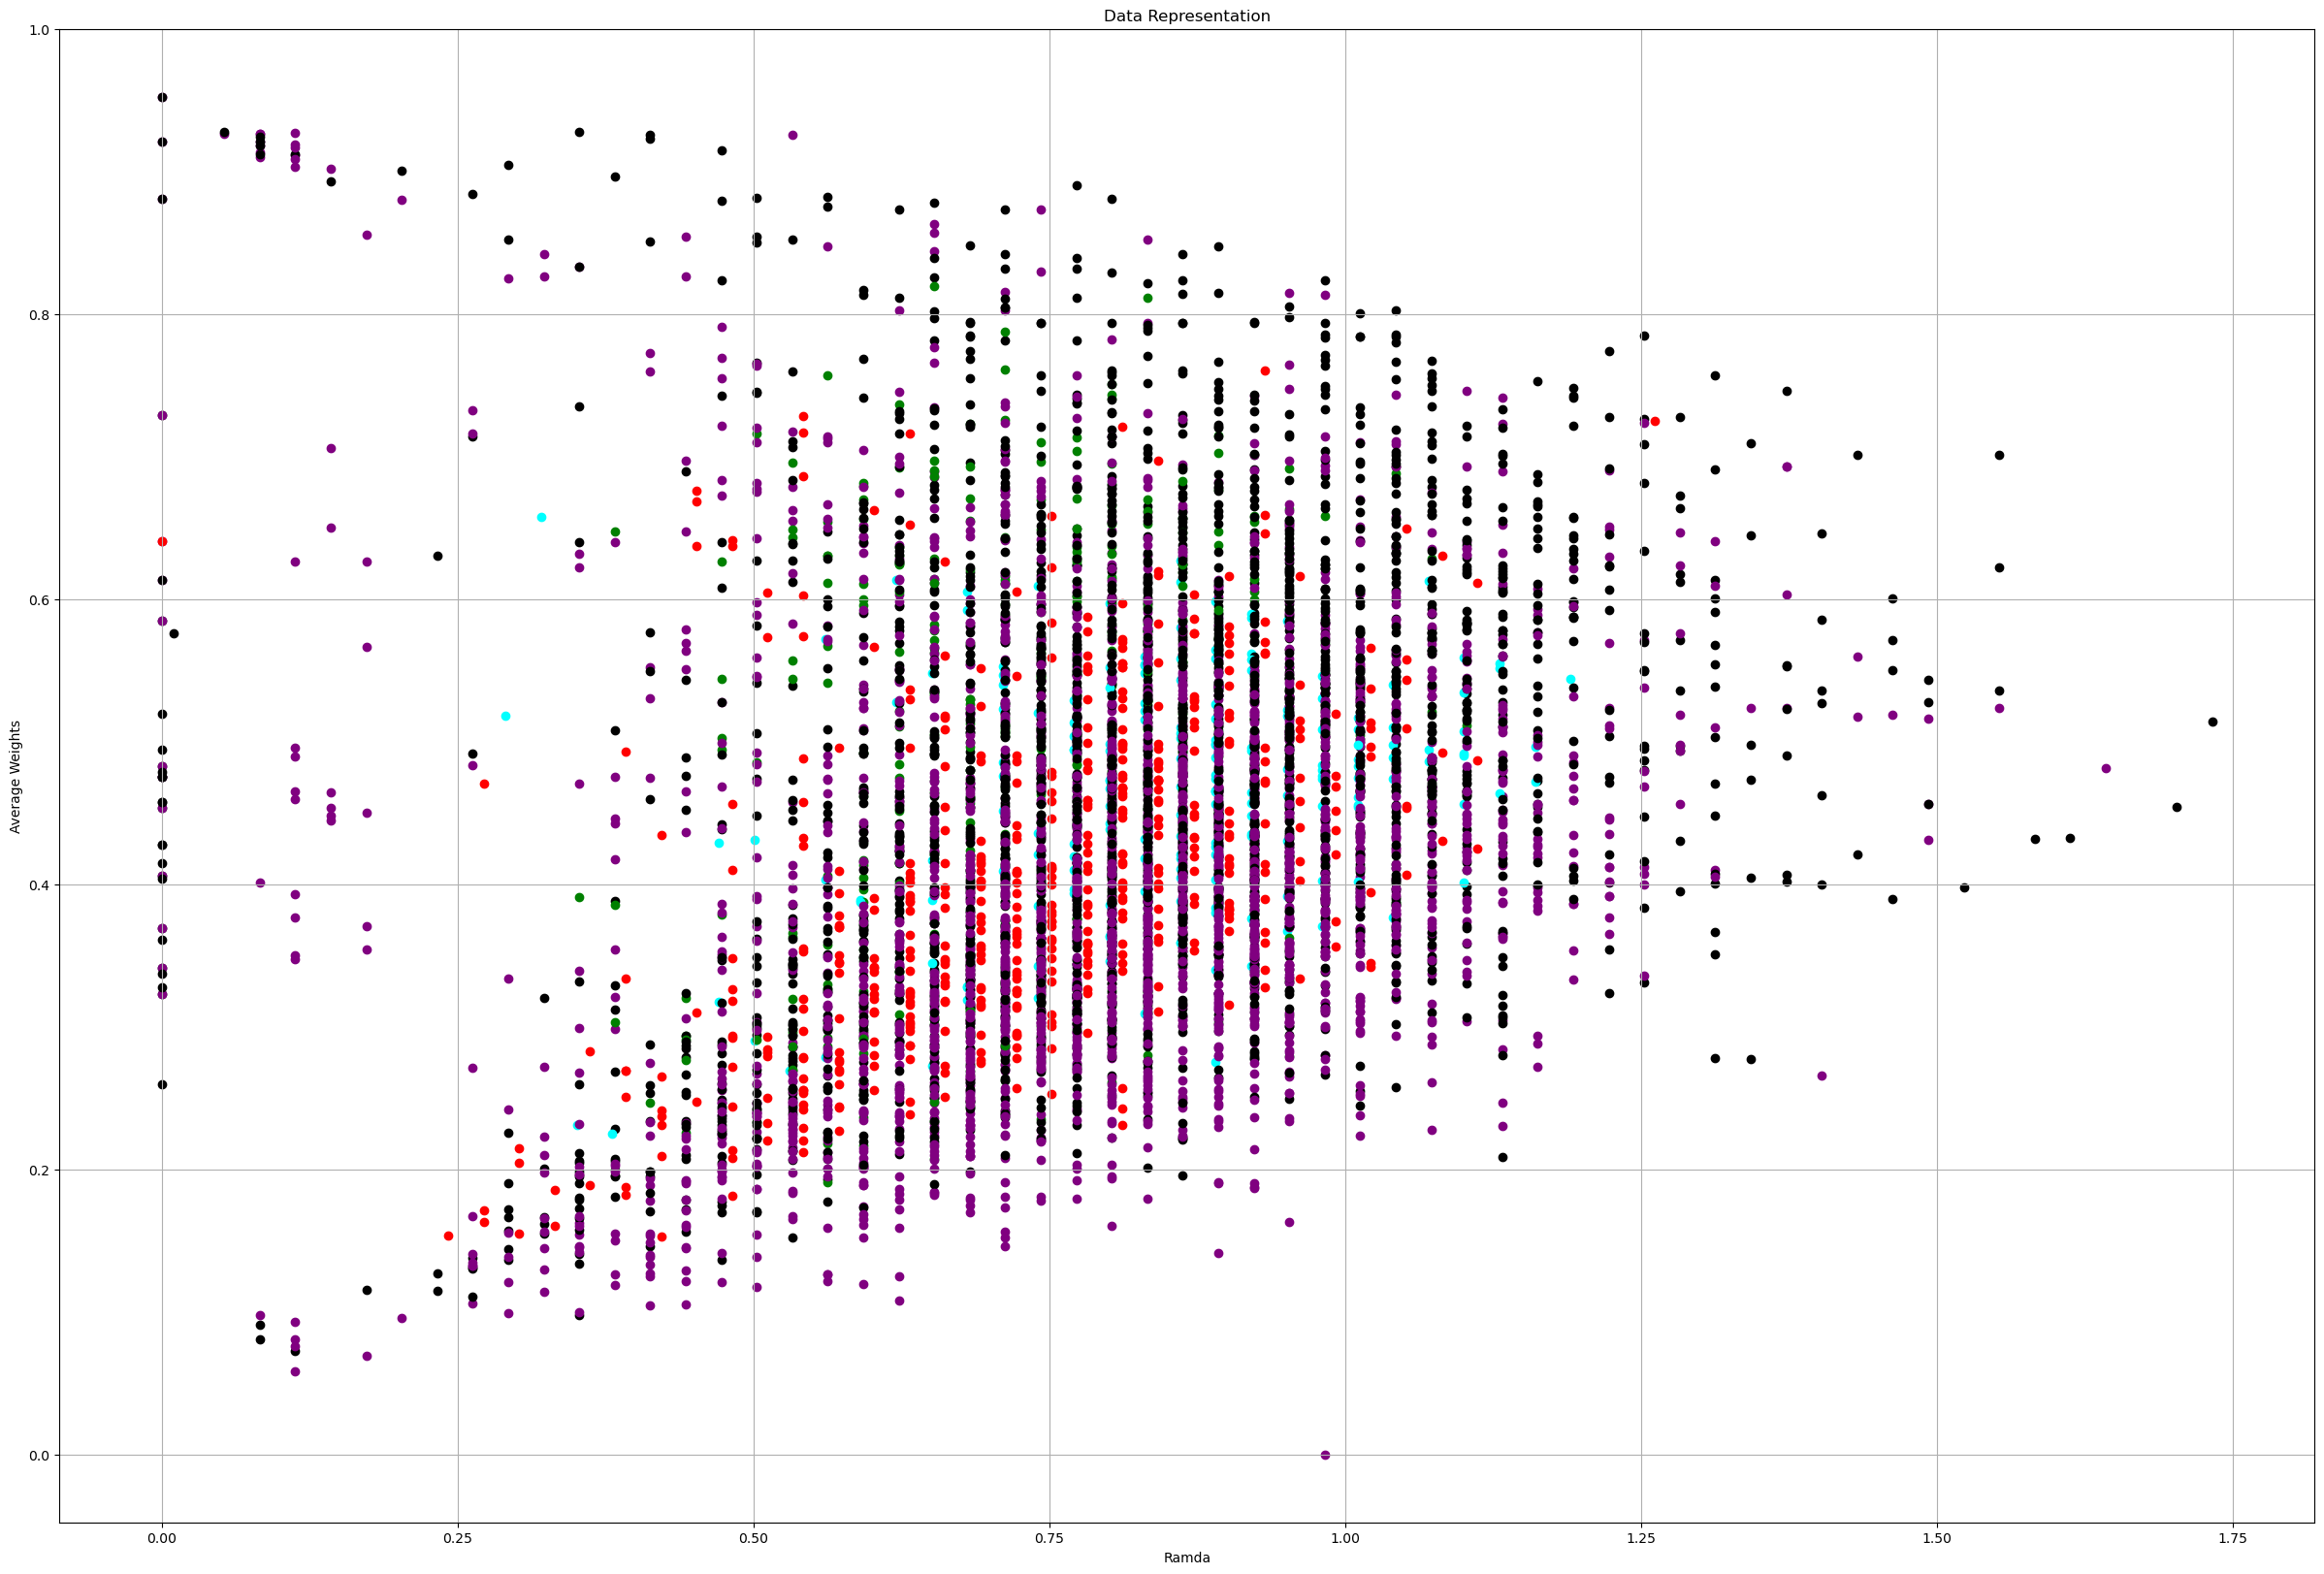

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def parse_data(line):
    if not line.startswith("ClassID"):
        return None
    try:
        split_data = line.split(" : ")
        class_id = int(split_data[0].split(" = ")[1])
        ramda = float(split_data[1].split(" = ")[1])
        outlayer = int(split_data[2].split(" = ")[1])
        weights = [float(weight) for weight in split_data[3].split(" = ")[1].split(", ")]

        return {'class_id': class_id, 'ramda': ramda, 'outlayer': outlayer, 'weights': weights}
    except Exception as e:
        print(f"Skipping line due to error: {e}")
        return None


# Read the data from a file
with open(r"C:\BEnvironment\TempFiles\_rce_Step1_OMRTrainData.dat", 'r') as f:
    lines = f.readlines()

# Parse each line, skipping lines that don't fit the format
data = [parse_data(line) for line in lines]
data = [d for d in data if d is not None]  # Remove None values from the list

# # Print parsed data for debugging
# for item in data:
#     print(item)

plt.figure(figsize=(30, 20))
colors = ['green','red', '#00FFFF', 'black', 'purple', 'orange']
for item in data:
    #if item['class_id'] == 0:
    x = item['ramda']
    y = np.mean(item['weights'])
    color =  colors[item['class_id']]
    plt.scatter(x, y, color=color)

plt.xlabel('Ramda')
plt.ylabel('Average Weights')
plt.title('Data Representation')
plt.grid(True)

# Save the figure
plt.savefig("scatter_plot.png")

plt.show()

In [21]:
import numpy as np

class_data = [
    {'class_id': 1, 'ramda': 0.936196, 'outlayer': 0, 'weights': [0.608094, 0.084386, 0.127132, 0.105322, 0.264309, 0.406064, 0.627859, 0.094540, 0.112491, 0.113338, 0.000000, 0.103768, 0.114166, 0.187766, 0.415914, 0.212788, 0.279151, 0.197181, 0.145978, 0.086825, 1.000000]},
    # Add more class data dictionaries here if needed
]

def calculate_ramda(class_data, in_layer_count):
    ramda = {}

    for class_info in class_data:
        class_id = class_info['class_id']
        weights = np.array(class_info['weights'])

        maxv = weights.max()
        minv = weights.min()

        val = np.sqrt(np.sum((maxv - minv) ** 2))
        ramda[class_id] = val

    return ramda

# Example usage:
in_layer_count = 21

ramda_values = calculate_ramda(class_data, in_layer_count)
print(ramda_values)


def calculate_ramda(class_id_arr, input_data_arr, in_layer_count):
    ramda = {}

    for class_id in class_id_arr:
        maxv = np.zeros(in_layer_count)
        minv = np.full(in_layer_count, 1000.0)

        for data, class_id_data in zip(input_data_arr, class_id_arr):
            if class_id_data != class_id:
                continue

            for k in range(in_layer_count):
                if maxv[k] < data[k]:
                    maxv[k] = data[k]
                if minv[k] > data[k]:
                    minv[k] = data[k]

        val = np.sum((maxv - minv) ** 2) ** 0.5
        ramda[class_id] = val

    return ramda

# Example usage:
class_id_arr = [0, 1, 2, 3, 4]
input_data_arr = [
    [1.0, 2.0, 3.0, 4.0, 5.0],
    [2.0, 3.0, 4.0, 5.0, 6.0],
    [3.0, 4.0, 5.0, 6.0, 7.0],
    [4.0, 5.0, 6.0, 7.0, 8.0],
    [5.0, 6.0, 7.0, 8.0, 9.0]
]
class_data = [
    {'class_id': 1, 'ramda': 0.936196, 'outlayer': 0, 'weights': [0.608094, 0.084386, 0.127132, 0.105322, 0.264309, 0.406064, 0.627859, 0.094540, 0.112491, 0.113338, 0.000000, 0.103768, 0.114166, 0.187766, 0.415914, 0.212788, 0.279151, 0.197181, 0.145978, 0.086825, 1.000000]},
    # Add more class data dictionaries here if needed
]
in_layer_count = 5

ramda_values = calculate_ramda(class_id_arr, input_data_arr, in_layer_count)
print(ramda_values)


{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0}


In [22]:
import numpy as np

class_data = [
    {'class_id': 1, 'ramda': 0.936196, 'outlayer': 0, 'weights': [0.608094, 0.084386, 0.127132, 0.105322, 0.264309, 0.406064, 0.627859, 0.094540, 0.112491, 0.113338, 0.000000, 0.103768, 0.114166, 0.187766, 0.415914, 0.212788, 0.279151, 0.197181, 0.145978, 0.086825, 1.000000]},
    # Add more class data dictionaries here if needed
]

def calculate_ramda(class_data, in_layer_count):
    ramda = {}

    for class_info in class_data:
        class_id = class_info['class_id']
        weights = np.array(class_info['weights'])

        maxv = weights.max()
        minv = weights.min()

        val = np.sqrt(np.sum((maxv - minv) ** 2))
        ramda[class_id] = val

    return ramda

# Example usage:
in_layer_count = 21

ramda_values = calculate_ramda(class_data, in_layer_count)
print(ramda_values)


{1: 1.0}


In [23]:
import numpy as np

def calculate_ramda(class_data, in_layer_count):
    ramda = {}

    for class_info in class_data:
        class_id = class_info['class_id']
        weights = np.array(class_info['weights'])

        maxv = weights.max()
        minv = weights.min()

        val = np.sqrt(np.sum((maxv - minv) ** 2))
        ramda[class_id] = val

    return ramda

# Example usage:
class_data = [
    {'class_id': 1, 'ramda': 0.936196, 'outlayer': 0, 'weights': [0.608094, 0.084386, 0.127132, 0.105322, 0.264309, 0.406064, 0.627859, 0.094540, 0.112491, 0.113338, 0.000000, 0.103768, 0.114166, 0.187766, 0.415914, 0.212788, 0.279151, 0.197181, 0.145978, 0.086825, 1.000000]},
    # Add more class data dictionaries here if needed
]
in_layer_count = 21

ramda_values = calculate_ramda(class_data, in_layer_count)
print(ramda_values)

{1: 1.0}


In [2]:
from sympy import symbols, Eq, solve

# Define the variables
x, a, b = symbols('x a b')

# The simplified first piece of the function
first_piece = (x**2-4)/(x-2)

# The second piece of the function
second_piece = a*x**2 + b*x + 3

# The third piece of the function
third_piece = 2*x - a - b

# Calculate the value of the second piece at x=2
second_piece_at_2 = second_piece.subs(x, 2)

# Calculate the value of the second and third pieces at x=3
second_piece_at_3 = second_piece.subs(x, 3)
third_piece_at_3 = third_piece.subs(x, 3)

# Set up the equations for continuity
eq1 = Eq(first_piece.subs(x, 2), second_piece_at_2)
eq2 = Eq(second_piece_at_3, third_piece_at_3)

# Solve the system of equations for a and b
solutions = solve((eq1, eq2), (a, b))
solutions

[]

In [3]:

import numpy as np




def taylor_log1p(x, N):

    return sum((-1)**(k + 1) * x**k / k for k in range(1, N + 1))




x_values = [-2/3, 1, 6/5]

N_terms = [100, 1000]




taylor_results = {x: {N: taylor_log1p(x, N) for N in N_terms} for x in x_values}

taylor_results

{-0.6666666666666666: {100: -1.0986122886681087, 1000: -1.0986122886681087},
 1: {100: 0.688172179310195, 1000: 0.6926474305598223},
 1.2: {100: -449678.51361470146, 1000: -8.275745823566158e+75}}

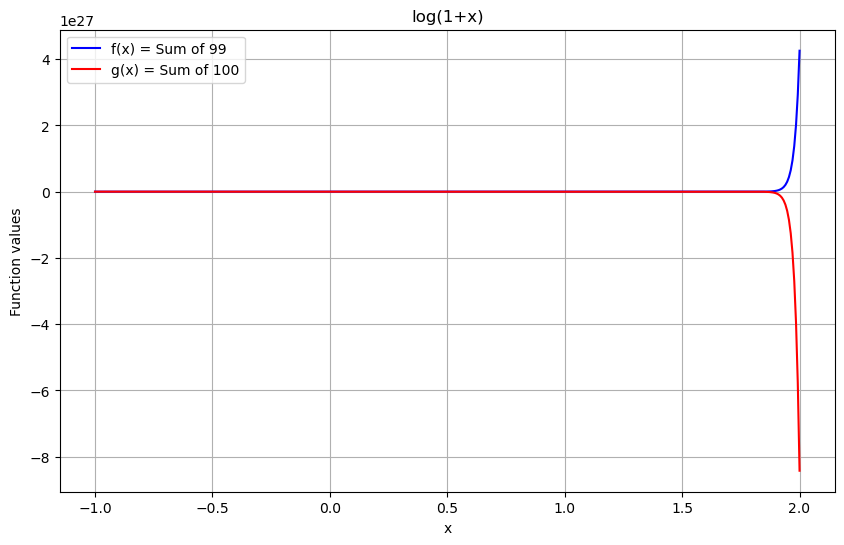

In [5]:
import matplotlib.pyplot as plt

def f(x):
    return sum((-1)**(k + 1) * x**k / k for k in range(1, 100))

def g(x):
    return sum((-1)**(k + 1) * x**k / k for k in range(1, 101))

x_plot = np.linspace(-1, 2, 400)
f_values = np.array([f(x) for x in x_plot])
g_values = np.array([g(x) for x in x_plot])

plt.figure(figsize=(10, 6))
plt.plot(x_plot, f_values, label='f(x) = Sum of 99', color='blue')
plt.plot(x_plot, g_values, label='g(x) = Sum of 100', color='red')
plt.title('log(1+x)')
plt.xlabel('x')
plt.ylabel('Function values')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from pysat.solvers import Solver
from pysat.formula import CNF

# Variables
l1_0 = 1
l2_0 = 2
l1_1 = 3
l2_1 = 4
mv_12_0 = 5
mv_21_0 = 6
mv_01_0 = 7

# Create CNF
cnf = CNF()

# Initial state constraints
cnf.append([l1_0])
cnf.append([-l2_0])

# Goal state constraint
cnf.append([l2_1])

# Action constraints
cnf.append([-mv_12_0, l1_0])
cnf.append([-mv_12_0, -l2_0])
cnf.append([-mv_12_0, -l1_1])
cnf.append([-mv_12_0, l2_1])

cnf.append([-mv_21_0, -l1_0])
cnf.append([-mv_21_0, l2_0])
cnf.append([-mv_21_0, l1_1])
cnf.append([-mv_21_0, -l2_1])

cnf.append([-mv_01_0, -l1_0])
cnf.append([-mv_01_0, -l2_0])
cnf.append([-mv_01_0, l1_1])
cnf.append([-mv_01_0, -l2_1])

# Action exclusivity
cnf.append([-mv_12_0, -mv_21_0])
cnf.append([-mv_12_0, -mv_01_0])
cnf.append([-mv_21_0, -mv_01_0])

# Only one action can be true at a time
cnf.append([mv_12_0, mv_21_0, mv_01_0])

# Solve the formula
with Solver(bootstrap_with=cnf) as solver:
    satisfiable = solver.solve()
    model = solver.get_model()

print("Satisfiable:", satisfiable)
if satisfiable:
    print("Model:", model)

Satisfiable: True
Model: [1, -2, -3, 4, 5, -6, -7]


In [6]:
from pysat.solvers import Solver
from pysat.formula import CNF

# Propositional Variables
A0, B0, C0 = 1, 2, 3
A1, B1, C1 = 4, 5, 6
A2, B2, C2 = 7, 8, 9
x0, y0, x1, y1 = 10, 11, 12, 13
move_AA_0, move_AB_0, move_BA_0, move_BC_0, move_AC_0 = 14, 15, 16, 17, 18
move_AA_1, move_AB_1, move_BA_1, move_BC_1, move_AC_1 = 19, 20, 21, 22, 23

# Create CNF
cnf = CNF()

# Initial State Constraints
cnf.append([A0])
cnf.append([-B0])
cnf.append([-C0])

# Goal State Constraint
cnf.append([C2])

# Action Constraints at Step 0
cnf.append([-move_AA_0, -x0, y0, A0, A1])
cnf.append([-move_AB_0, x0, y0, A0, B1])
cnf.append([-move_BA_0, -x0, -y0, B0, A1])
cnf.append([-move_BC_0, x0, -y0, B0, C1])
cnf.append([-move_AC_0, -x0, y0, A0, C1])

# Action Constraints at Step 1
cnf.append([-move_AA_1, -x1, y1, A1, A2])
cnf.append([-move_AB_1, x1, y1, A1, B2])
cnf.append([-move_BA_1, -x1, -y1, B1, A2])
cnf.append([-move_BC_1, x1, -y1, B1, C2])
cnf.append([-move_AC_1, -x1, y1, A1, C2])

# Action Exclusivity Constraints at Step 0
cnf.append([-move_AA_0, -move_AB_0])
cnf.append([-move_AA_0, -move_BA_0])
cnf.append([-move_AA_0, -move_BC_0])
cnf.append([-move_AA_0, -move_AC_0])
cnf.append([-move_AB_0, -move_BA_0])
cnf.append([-move_AB_0, -move_BC_0])
cnf.append([-move_AB_0, -move_AC_0])
cnf.append([-move_BA_0, -move_BC_0])
cnf.append([-move_BA_0, -move_AC_0])
cnf.append([-move_BC_0, -move_AC_0])

# Action Exclusivity Constraints at Step 1
cnf.append([-move_AA_1, -move_AB_1])
cnf.append([-move_AA_1, -move_BA_1])
cnf.append([-move_AA_1, -move_BC_1])
cnf.append([-move_AA_1, -move_AC_1])
cnf.append([-move_AB_1, -move_BA_1])
cnf.append([-move_AB_1, -move_BC_1])
cnf.append([-move_AB_1, -move_AC_1])
cnf.append([-move_BA_1, -move_BC_1])
cnf.append([-move_BA_1, -move_AC_1])
cnf.append([-move_BC_1, -move_AC_1])

# Only one action can be true at a time
cnf.append([move_AA_0, move_AB_0, move_BA_0, move_BC_0, move_AC_0])
cnf.append([move_AA_1, move_AB_1, move_BA_1, move_BC_1, move_AC_1])

# Solve the formula
with Solver(bootstrap_with=cnf) as solver:
    satisfiable = solver.solve()
    model = solver.get_model()

print("Satisfiable:", satisfiable)
if satisfiable:
    print("Model:", model)


Satisfiable: True
Model: [1, -2, -3, -4, -5, -6, -7, -8, 9, -10, -11, -12, -13, 14, -15, -16, -17, -18, 19, -20, -21, -22, -23]


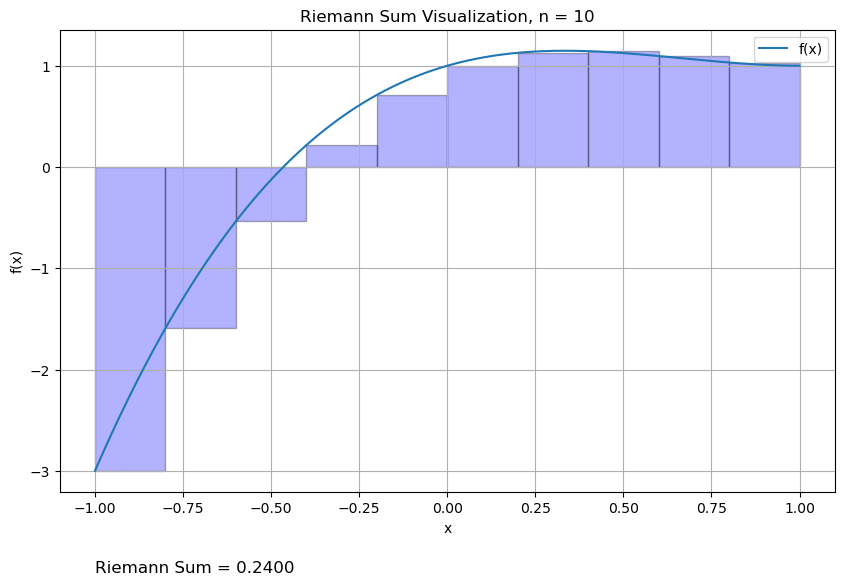

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def RiemannSumVisualization(f, a, b, n):
    dx = (b - a) / n
    
    x = np.linspace(a, b, 1000)
    y = f(x)
    
    x_rect = np.linspace(a, b, n, endpoint=False)
    y_rect = f(x_rect)
    riemann_sum = np.sum(y_rect * dx)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Riemann Sum Visualization, n = {n}')
    
    for i in range(n):
        plt.gca().add_patch(plt.Rectangle((x_rect[i], 0), dx, y_rect[i], 
                                          edgecolor='black', facecolor='blue', alpha=0.3))
    
    plt.text(a, min(y) - 1, f'Riemann Sum = {riemann_sum:.4f}', fontsize=12, ha='left')
    plt.legend()
    plt.grid(True)
    plt.show()

def f(x):
    return x**3 - 2*x**2 + x + 1

RiemannSumVisualization(f, -1, 1, 10)


# Explanation
Function Definition
f: The function.
a, b: bounds.
n: number of rectangles.

# Compute the Width
dx = (b - a) / n: The width of each rectangle.

# Generate Points for Plotting
x = np.linspace(a, b, 1000): 1000 points.
y = f(x): function values at these points.

# Compute the Riemann Sum
x_rect = np.linspace(a, b, n, endpoint=False): x where the rectangles evaluated.
y_rect = f(x_rect): values at these x-coordinates.
riemann_sum = np.sum(y_rect * dx): Riemann sum calculation.

# Plot the Function
A plot of 
𝑓(𝑥) over the interval 
[
𝑎
,
𝑏
]


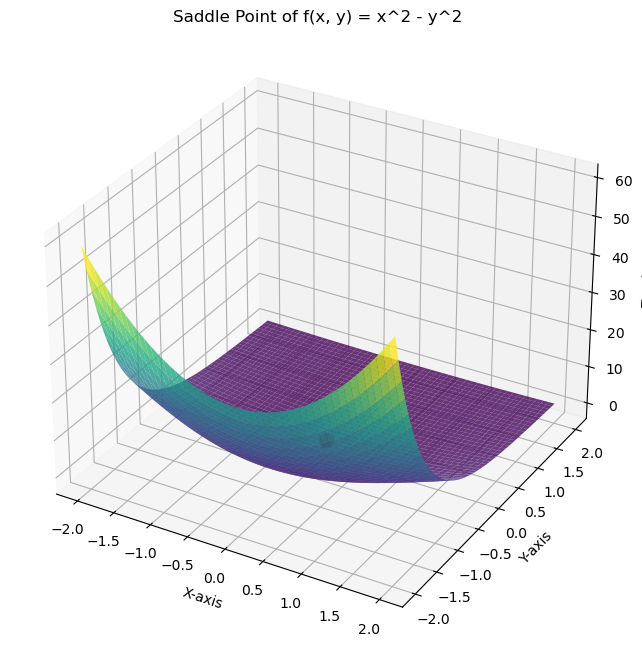

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return (x**2 + y**2) * np.exp(-y)


x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

ax.scatter(0, 0, f(0, 0), color='r', s=100)


ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Saddle Point of f(x, y) = x^2 - y^2')

plt.show()